In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [7]:
df = pd.read_csv('/Users/utsav/Desktop/Salary Pred/Data/Salary_Data.csv') 

In [ ]:
df.head() 

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
df.shape 

(375, 6)

In [ ]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [ ]:
df.describe() 

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [ ]:
df.dropna(inplace=True) 

<Axes: xlabel='Salary'>

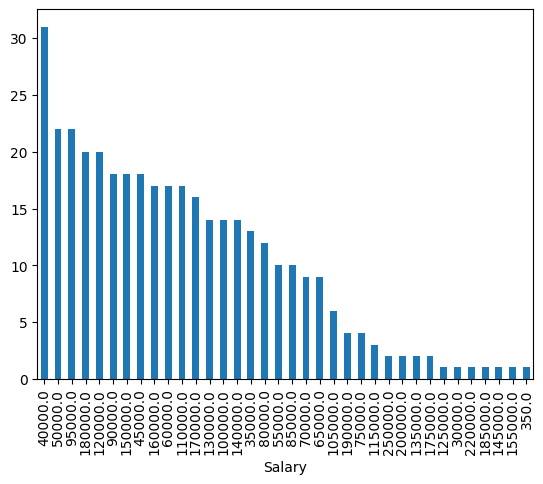

In [ ]:
df['Salary'].value_counts().plot(kind='bar') 

In [ ]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

<Axes: xlabel='Education Level', ylabel='Count'>

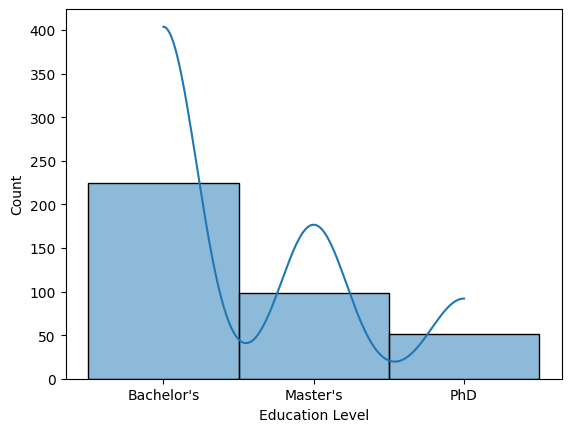

In [ ]:
sns.histplot(df['Education Level'], kde = True) 

<Axes: xlabel='Gender', ylabel='count'>

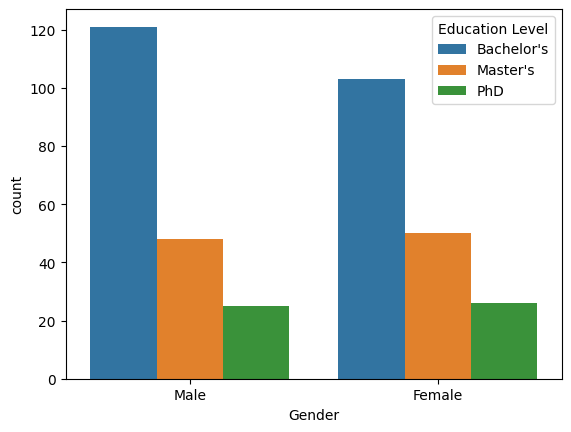

In [ ]:
sns.countplot(x = df['Gender'] , hue = df['Education Level']) 

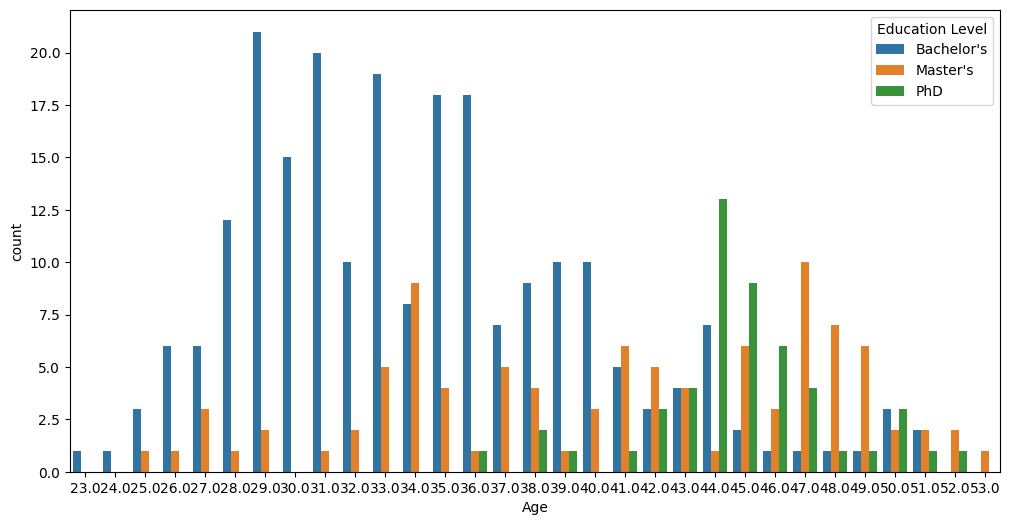

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Age'], hue=df['Education Level'])
plt.show()

<Axes: xlabel='Age', ylabel='Salary'>

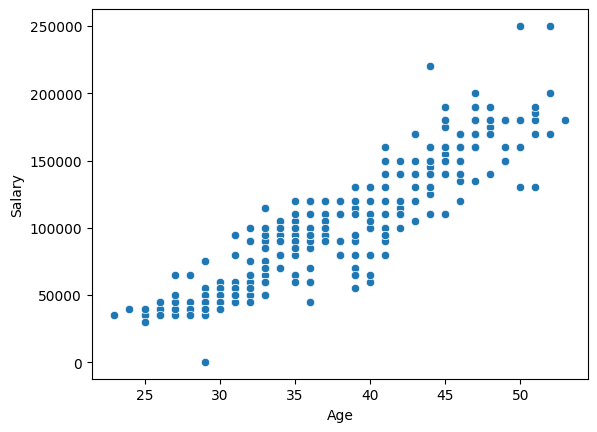

In [ ]:
sns.scatterplot(x='Age', y='Salary', data=df)

<Axes: xlabel='Years of Experience', ylabel='Salary'>

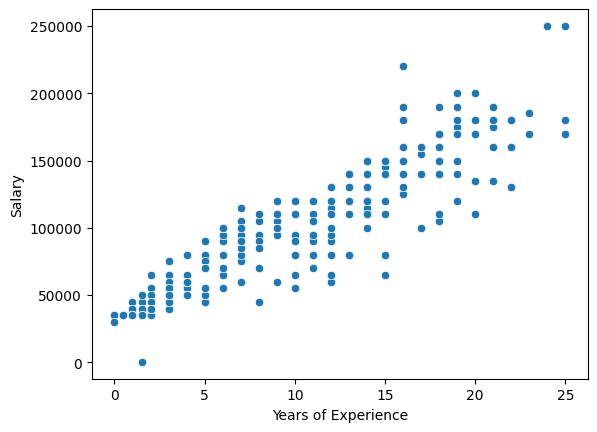

In [ ]:
sns.scatterplot(x='Years of Experience', y='Salary', data=df)

<Axes: xlabel='Years of Experience', ylabel='Age'>

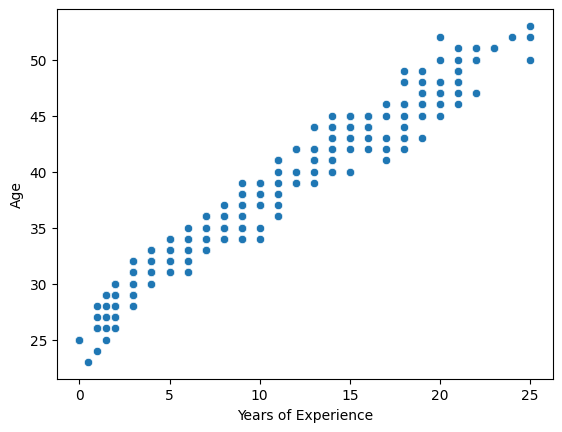

In [ ]:
sns.scatterplot(x='Years of Experience', y='Age', data=df)

<Axes: >

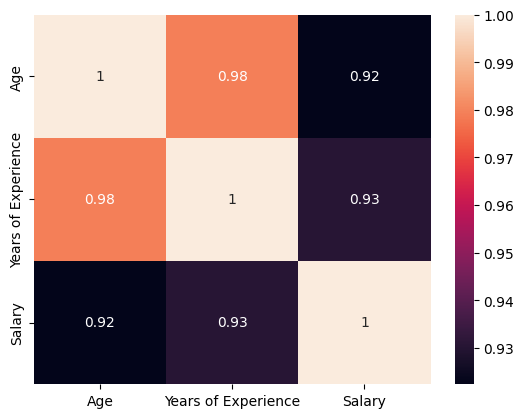

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender_Encode'] = le.fit_transform(df['Gender'])
df['Education Level_Encode'] = le.fit_transform(df['Education Level'])
df['Job Title_Encode'] = le.fit_transform(df['Job Title'])



In [ ]:
df.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_Encode,Education Level_Encode,Job Title_Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])
df['Years of Experience_scaled'] = scaler.fit_transform(df[['Years of Experience']])


In [ ]:
scaler = StandardScaler()
scaler.fit(df[['Age', 'Years of Experience']])
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
df.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_Encode,Education Level_Encode,Job Title_Encode,Age_scaled,Years of Experience_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.769398,-0.768276
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.336003,-1.073702
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.072068,0.758859


In [ ]:
X = df[['Age_scaled', 'Years of Experience_scaled','Gender_Encode','Education Level_Encode','Job Title_Encode']]
y = df['Salary']

In [ ]:
X.head(5)

,Age_scaled,Years of Experience_scaled,Gender_Encode,Education Level_Encode,Job Title_Encode
0,-0.769398,-0.768276,1,0,159
1,-1.336003,-1.073702,0,1,17
2,1.072068,0.758859,1,2,130
3,-0.202793,-0.462849,0,0,101
4,2.063627,1.522426,1,1,22


<Axes: >

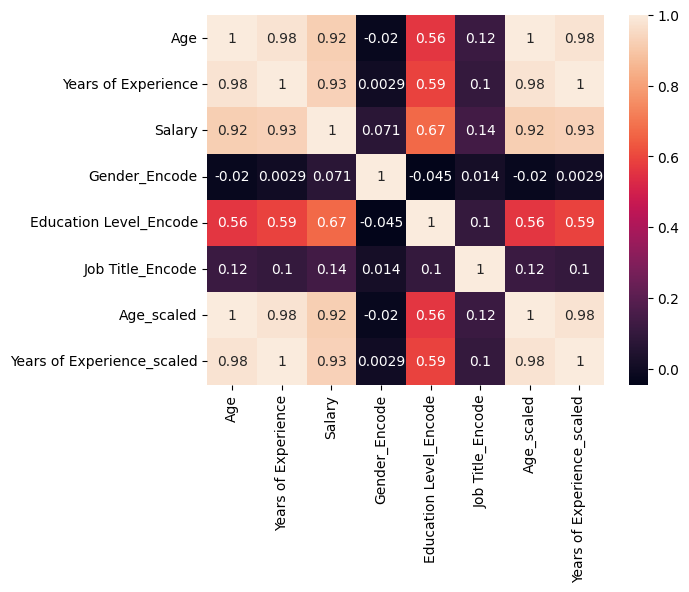

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Train the model
lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)

# Predict
y_pred = lrmodel.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 10928.921486231377
MSE: 249075656.42722017
RMSE: 15782.13092162209
R² Score: 0.896113820782187


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfmodel = RandomForestRegressor(random_state=42)

rfmodel.fit(X_train, y_train)

y_pred = rfmodel.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)



MAE: 8539.457666666665
MSE: 144312066.98974168
RMSE: 12012.995754171467
R² Score: 0.9398093355664005


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtmodel = DecisionTreeRegressor(random_state=42)

dtmodel.fit(X_train, y_train)

y_pred = dtmodel.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 10600.0
MSE: 251000000.0
RMSE: 15842.97951775486
R² Score: 0.8953112023964883


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbmodel = GradientBoostingRegressor(random_state=42)

gbmodel.fit(X_train, y_train)

y_pred = gbmodel.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 9034.648994022295
MSE: 176948120.6057884
RMSE: 13302.184805729787
R² Score: 0.926197266994338


In [ ]:
import joblib
joblib.dump(rfmodel, 'RF_Salary_pred.pkl')
joblib.dump(X.columns, 'columns.pkl')

['columns.pkl']